In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
#data.head()

(9134, 24)

In [26]:
new_cols = []
def column_names(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_cols.append(x)
    df.columns = new_cols
    display(df.head())
    
column_names(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [27]:
data=data[data['income']>0]

numerical variables:

In [28]:
data_num = data.select_dtypes(include=np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000


distribution/histogram plot:focus on continuous variables.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

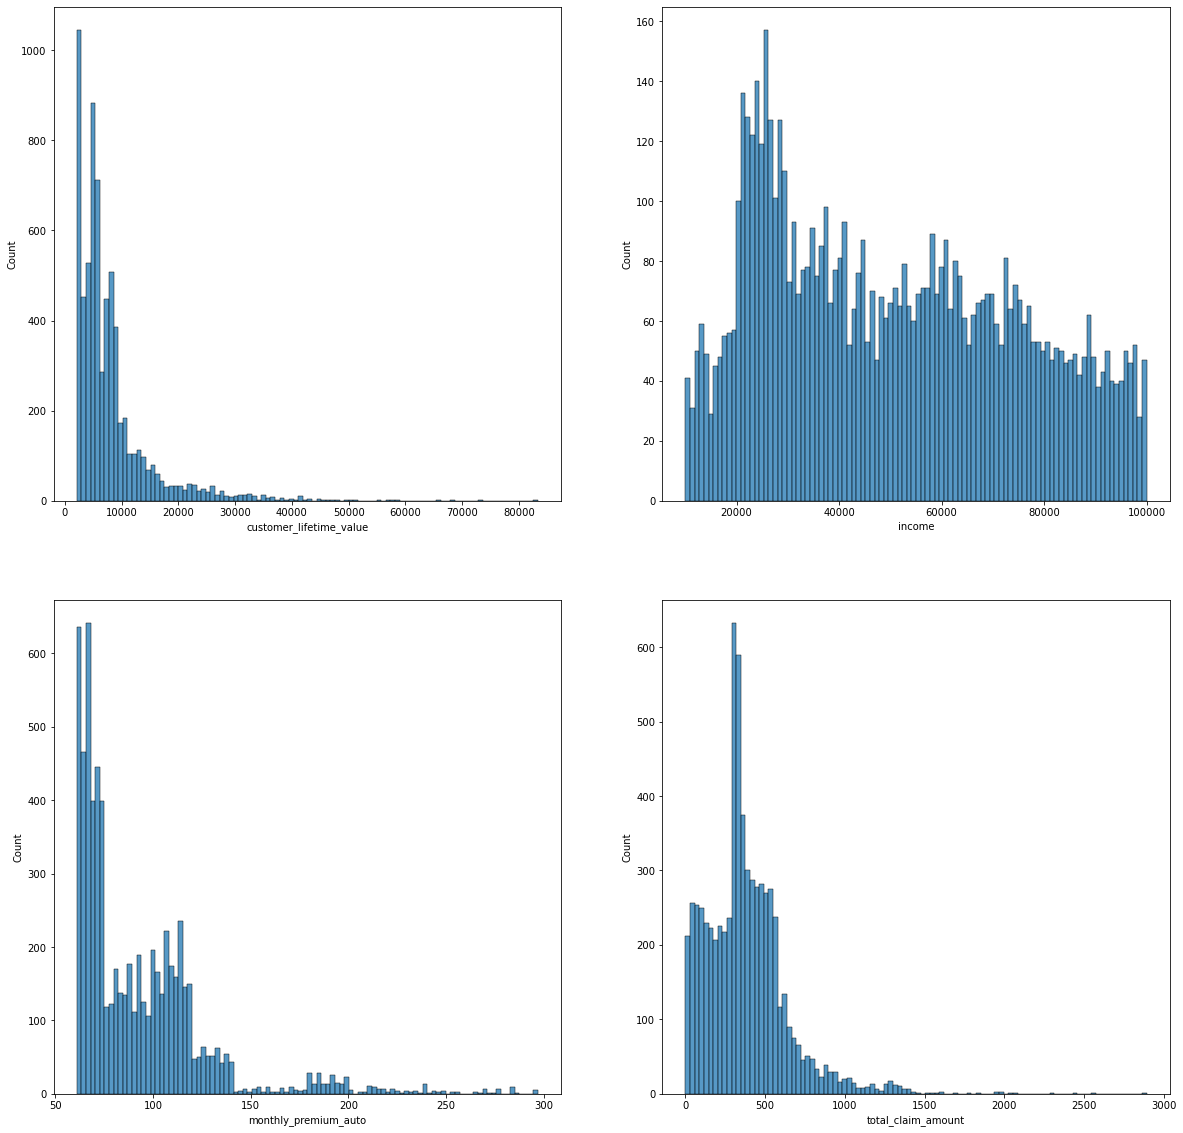

In [29]:
fig, ax1 = plt.subplots(2,2,figsize=(20,20)) 
sns.histplot(x ="customer_lifetime_value",data = data_num ,bins = 100, ax = ax1[0,0])
sns.histplot(x ="income",data = data_num ,bins = 100, ax = ax1[0,1])
sns.histplot(x ="monthly_premium_auto",data = data_num ,bins = 100, ax = ax1[1,0])
sns.histplot(x ="total_claim_amount",data = data_num ,bins = 100, ax = ax1[1,1])

Customer Lifetime Value, Income, Monthly Premium Auto, Total Claim Amount need to be tranformed. 

np.log(x)
data_num_log = list(map(np.log, data_num['customer_lifetime_value'])
data_num_log
#sns.histplot(x ='customer_lifetime_value',data = data_num_log ,bins = 100, ax = ax1[0,0])
#plt.show()

No -ve values in income as i dropped 0s in income at the beginnning. so no need for this step. 
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

data_num2['income'] = list(map(log_transfom_clean2,data_num2['income']))

#Now we replace the NAN by the mean

data_num2['income'] = data_num2['income'].fillna(np.mean(data_num2['income']))
sns.displot(data_num2['income'])
plt.show()

In [37]:
#LOG TRANSFORMATION
data_num1 = data_num.copy()
for col in ['income','customer_lifetime_value','monthly_premium_auto','total_claim_amount']:
    data_num1[col+"_log"] = np.log(data_num[col])

In [38]:
data_num1.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,income_log,customer_lifetime_value_log,monthly_premium_auto_log,total_claim_amount_log
0,2763.519279,56274,69,32,5,0,1,384.811147,10.937988,7.924260,4.234107,5.952753
2,12887.431650,48767,108,18,38,0,2,566.472247,10.794809,9.464008,4.682131,6.339428
4,2813.692575,43836,73,12,44,0,1,138.130879,10.688211,7.942253,4.290459,4.928202
5,8256.297800,62902,69,14,94,0,2,159.383042,11.049333,9.018732,4.234107,5.071310
6,5380.898636,55350,67,0,13,0,9,321.600000,10.921432,8.590611,4.204693,5.773309


<AxesSubplot:xlabel='income_log', ylabel='Count'>

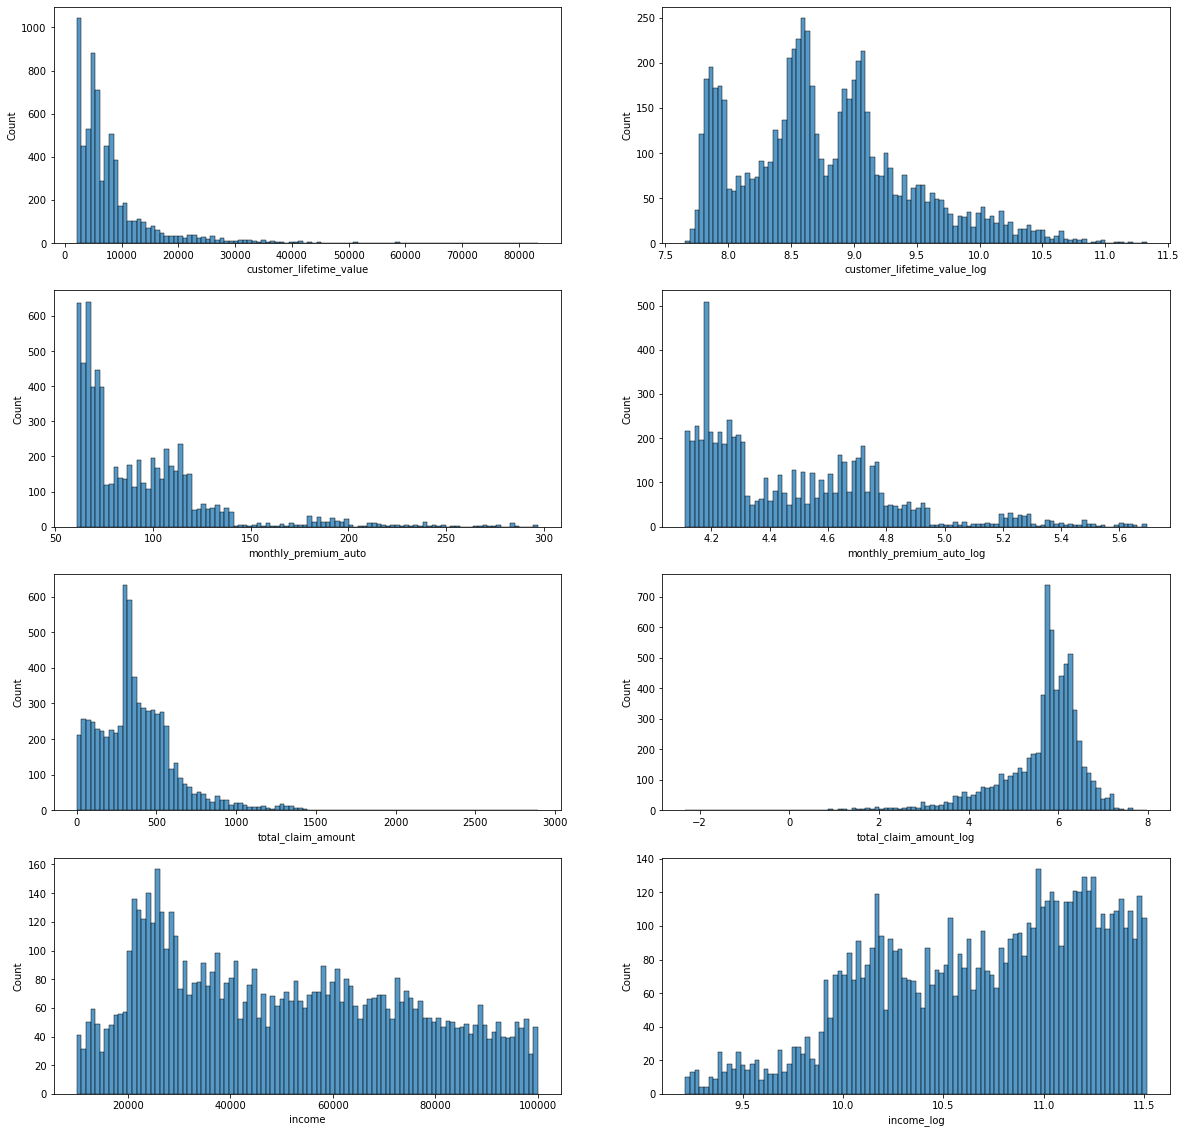

In [39]:
#compare
fig, ax1 = plt.subplots(4,2,figsize=(20,20)) 
sns.histplot(x ="customer_lifetime_value",data = data_num ,bins = 100, ax = ax1[0,0])
sns.histplot(x ="customer_lifetime_value_log",data = data_num1 ,bins = 100, ax = ax1[0,1])
sns.histplot(x ="monthly_premium_auto",data = data_num ,bins = 100, ax = ax1[1,0])
sns.histplot(x ="monthly_premium_auto_log",data = data_num1 ,bins = 100, ax = ax1[1,1])
sns.histplot(x ="total_claim_amount",data = data_num ,bins = 100, ax = ax1[2,0])
sns.histplot(x ="total_claim_amount_log",data = data_num1 ,bins = 100, ax = ax1[2,1])
sns.histplot(x ="income",data = data_num ,bins = 100, ax = ax1[3,0])
sns.histplot(x ="income_log",data = data_num1 ,bins = 100, ax = ax1[3,1])

I believe box cox produces better results as shown in week4day2 lab1 : comparring regression models. nevertheless, it was important to carry out the log transformation in this lab to compare the transformation results. 